<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных,-проверка-типов-переменных,-пропусков-и-дубликатов" data-toc-modified-id="Загрузка-данных,-проверка-типов-переменных,-пропусков-и-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка данных, проверка типов переменных, пропусков и дубликатов</a></span></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение и проверка данных</a></span></li><li><span><a href="#Фильтрация-данных" data-toc-modified-id="Фильтрация-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Фильтрация данных</a></span></li></ul></li><li><span><a href="#Оценка-корректности-проведения-теста" data-toc-modified-id="Оценка-корректности-проведения-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценка корректности проведения теста</a></span><ul class="toc-item"><li><span><a href="#Пересечение-тестовой-аудитории-с-конкурирующим-тестом" data-toc-modified-id="Пересечение-тестовой-аудитории-с-конкурирующим-тестом-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Пересечение тестовой аудитории с конкурирующим тестом</a></span></li><li><span><a href="#Совпадение-теста-и-маркетинговых-событий" data-toc-modified-id="Совпадение-теста-и-маркетинговых-событий-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Совпадение теста и маркетинговых событий</a></span></li><li><span><a href="#Другие-проблемы-временных-границ-и-полноты-данных-теста" data-toc-modified-id="Другие-проблемы-временных-границ-и-полноты-данных-теста-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Другие проблемы временных границ и полноты данных теста</a></span></li></ul></li><li><span><a href="#Анализ-результатов-эксперимента" data-toc-modified-id="Анализ-результатов-эксперимента-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ результатов эксперимента</a></span><ul class="toc-item"><li><span><a href="#Воронка-событий" data-toc-modified-id="Воронка-событий-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Воронка событий</a></span></li><li><span><a href="#Конверсии-воронки" data-toc-modified-id="Конверсии-воронки-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Конверсии воронки</a></span></li><li><span><a href="#Динамика-конверсий-воронки-по-группам" data-toc-modified-id="Динамика-конверсий-воронки-по-группам-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Динамика конверсий воронки по группам</a></span></li><li><span><a href="#Итоговые-конверсии-воронки-по-группам" data-toc-modified-id="Итоговые-конверсии-воронки-по-группам-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Итоговые конверсии воронки по группам</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ результатов A/B-теста интернет-магазина

## Описание проекта

**Постановка задачи:**

В рамках изучения пользовательского поведения интернет-магазина проанализируем ключевые коммерческие метрики в разрезе основных этапов воронки продаж и результаты A/B-теста, проведенного с 2020-12-07 по 2021-01-04 для оценки влияния новой рекомендательной системы на поведение пользователей. Это позволит в дальнейшем минимизировать риск того, что изменение рекомендательной системы окажется непривычным для пользователей и негативно скажется на конверсии магазина. Также оценим корректность проведения теста в части времени проведения и аудитории и статистическую значимость полученных результатов.

    
**Описание данных:**

При анализе будут использоваться данные, полученные от 2 групп - контрольной и экспериментальной:
- данные пользователей (дата регистрации, регион, устройство);
- действия пользователей (дата, тип события, дополнительные данные о событии);
- участники тестов (название теста, группа).

In [44]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from IPython.display import display
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from io import BytesIO
from io import StringIO

## Загрузка и подготовка данных

### Загрузка данных, проверка типов переменных, пропусков и дубликатов

Откроем файлы с данными и изучим общую информацию:

In [3]:
def file_read (filename, date_columns):
    if os.path.exists('/datasets/' + filename):
        file_read = pd.read_csv('/datasets/' + filename, parse_dates=date_columns)
    else:
        file_read = pd.read_csv(filename, parse_dates=date_columns)
    return file_read

marketing_events = file_read('ab_project_marketing_events.csv', ['start_dt','finish_dt'])
new_users = file_read('final_ab_new_users.csv', ['first_date'])
events = file_read('final_ab_events.csv', ['event_dt'])
participants = file_read('final_ab_participants.csv', False)

In [4]:
file_list = [marketing_events, new_users, events, participants]
names = ['Marketing events', 'New users', 'Events', 'Participants']

for data, name in zip(file_list, names):
    print('\033[1m'+ name)
    display(data.head(14))
    data.info()
    print()
    print('Дубликатов в таблице: {}'.format(data.duplicated().sum()))
    print()

Marketing events


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
name         14 non-null object
regions      14 non-null object
start_dt     14 non-null datetime64[ns]
finish_dt    14 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes

Дубликатов в таблице: 0

New users


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
user_id       61733 non-null object
first_date    61733 non-null datetime64[ns]
region        61733 non-null object
device        61733 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB

Дубликатов в таблице: 0

Events


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
user_id       440317 non-null object
event_dt      440317 non-null datetime64[ns]
event_name    440317 non-null object
details       62740 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB

Дубликатов в таблице: 0

Participants


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
5,4FF2998A348C484F,A,recommender_system_test
6,7473E0943673C09E,A,recommender_system_test
7,C46FE336D240A054,A,recommender_system_test
8,92CB588012C10D3D,A,recommender_system_test
9,057AB296296C7FC0,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
user_id    18268 non-null object
group      18268 non-null object
ab_test    18268 non-null object
dtypes: object(3)
memory usage: 428.3+ KB

Дубликатов в таблице: 0



**Marketing events.**
В таблице содержится 14 записей и 4 переменные, дубликатов и пропусков не обнаружено. Типы переменных распознаны верно, названия закодированы корректно.

**New users.**
В массиве данных содержится 61733 записей и 4 переменные, дубликатов и пропусков не обнаружено. Типы переменных распознаны верно, названия закодированы корректно.

**Events.**
В исходном датасете содержится 440317 записей и 4 переменные, дубликатов не обнаружено, однако в переменной details есть пропуски, значит, для части событий дополнительные данные отсутствуют. Типы переменных распознаны верно, названия закодированы корректно.

**Participants.**
В массиве данных содержится 18268 записей и 3 переменные, дубликатов и пропусков не обнаружено. Типы переменных распознаны верно, названия закодированы корректно. 

### Изучение и проверка данных

Изучим уникальные значения категориальных переменных:

In [5]:
def unique(data,var):
    print('\033[1m'+ 'Уникальные значения переменной '+var + '\033[0m')
    print(data[var].unique())
    print()

unique(marketing_events, 'regions')
unique(new_users, 'region')
unique(new_users, 'device')
unique(events, 'event_name')
unique(events, 'details')
unique(participants, 'group')
unique(participants, 'ab_test')

Уникальные значения переменной regions
['EU, N.America' 'EU, CIS, APAC, N.America' 'N.America' 'APAC'
 'EU, CIS, APAC' 'CIS']

Уникальные значения переменной region
['EU' 'N.America' 'APAC' 'CIS']

Уникальные значения переменной device
['PC' 'Android' 'iPhone' 'Mac']

Уникальные значения переменной event_name
['purchase' 'product_cart' 'product_page' 'login']

Уникальные значения переменной details
[ 99.99   9.99   4.99 499.99    nan]

Уникальные значения переменной group
['A' 'B']

Уникальные значения переменной ab_test
['recommender_system_test' 'interface_eu_test']



Все категориальные переменные закодированы корректно. Проводимые маркетинговые кампании и пользователи охватывают 4 региона, при этом названия регионов из таблицы мероприятий соответствуют названиям регионов из таблицы с действиями пользователей. Клиенты магазина использовали 4 типа устройств. Также в данных содержится информация о 2 экспериментах с двухвыборочным дизайном: одной контрольной и одной экспериментальной группами. Действия пользователей сгруппированы в 4 типа: покупка, переход в корзину, посещение продуктовой страницы и вход в личный кабинет. Переменная details принимает 4 уникальных значения.

Изучим, как соотносятся переменные details и типы событий:

In [6]:
sum_purchases = events.pivot_table(
    index='details', 
    columns = 'event_name', 
    values=['event_dt'], 
    aggfunc=({'event_dt': 'count'}), fill_value=0).reset_index()

sum_purchases.columns = ['price', 'purchases']
display(sum_purchases)

,price,purchases
0,4.99,46362
1,9.99,9530
2,99.99,5631
3,499.99,1217


Поскольку переменная details заполнена только для записей, соответствующих типу событий "покупка", можно считать, что она содержит информацию о стоимости совершенных покупок.

Посчитаем общую сууму покупок и выведем график:

,price,purchases,sales
0,4.99,46362,231346.38
1,9.99,9530,95204.70
2,99.99,5631,563043.69
3,499.99,1217,608487.83


Суммарные продажи магазина:  1498082.6


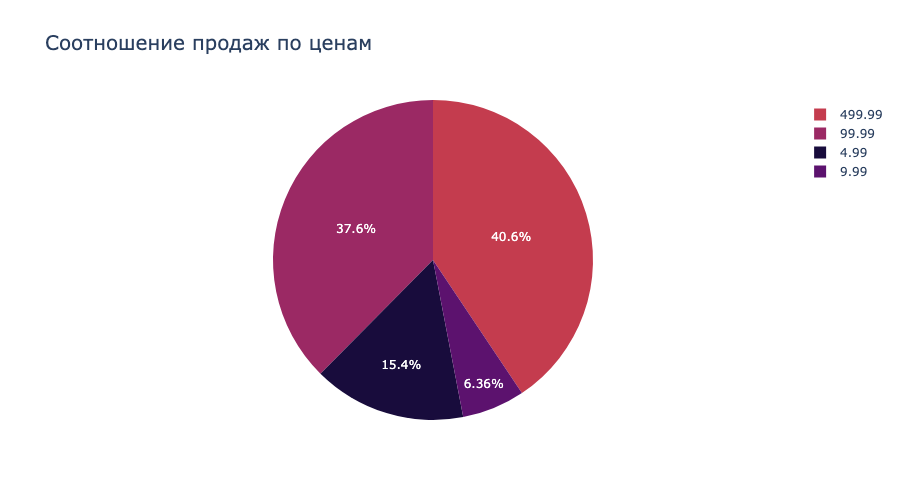

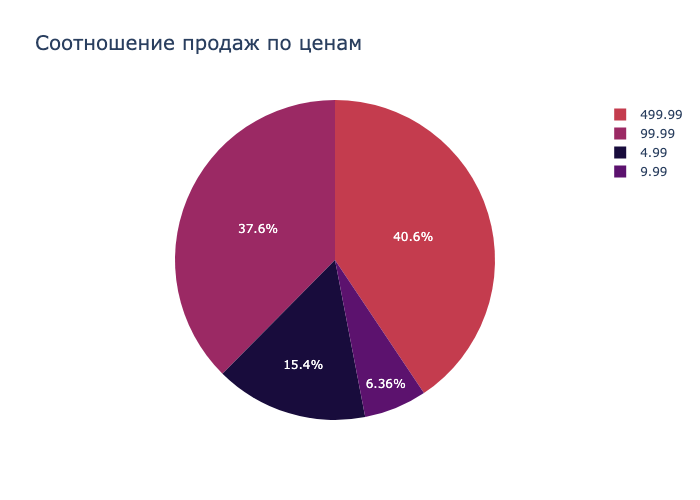

In [64]:
sum_purchases['sales'] = sum_purchases['price']*sum_purchases['purchases']
display(sum_purchases)
print('Суммарные продажи магазина: ', sum_purchases['sales'].sum())

fig = go.Figure(data=[go.Pie(labels=sum_purchases['price'], 
                             values=sum_purchases['sales'])])
fig.update_layout(title_text='Соотношение продаж по ценам', title_font_size=20)
fig.update_traces(marker=dict(colors=['#180c3c', '#5c126e', '#9b2964', '#c43c4e']))
fig.show(width=900, height=500, renderer='png')
fig.show("png")

Суммарные продажи интернет-магазина составили 1498082 у.е., при этом 40% доходов составили продажи товаров по цене 500 у.е., на втором месте - товары по 100 у.е., товары с ценами 5 и 10 у.е. суммарно генерируют немногим больше 20% всех доходов бизнеса.

Проверим, как соотносятся списки уникальных пользователей в трех таблицах: new_users, events, participants.

In [8]:
unique_new_users = new_users['user_id'].unique()
unique_events = events['user_id'].unique()
unique_participants = participants['user_id'].unique()

print('Уникальных пользователей new_users:', len(unique_new_users))
print('Уникальных пользователей events:', len(unique_events))
print('Уникальных пользователей participants:', len(unique_participants))
print('Пересечения пользователей new_users и events:', len(list(set(unique_new_users) & 
                                                                set(unique_events))))
print('Пересечения пользователей participants и events:', len(list(set(unique_participants) & 
                                                                   set(unique_events))))
print('Пересечения пользователей participants и new_users:', len(list(set(unique_participants) & 
                                                                      set(unique_new_users))))

Уникальных пользователей new_users: 61733
Уникальных пользователей events: 58703
Уникальных пользователей participants: 16666
Пересечения пользователей new_users и events: 58703
Пересечения пользователей participants и events: 13638
Пересечения пользователей participants и new_users: 16666


В таблице new_users все записи уникальны по user_id, однако в таблице participants содержится больше записей, чем уникальных пользователей (18268 записей и 61733 пользователей), значит, один и тот же пользователь мог попасть в группы A и B или принять участие в двух тестах. Проверим это отдельно.

Все участники теста и пользователи из таблицы событий есть в таблице new_users, при этом информация о событиях (то есть совершенных действиях) есть только только по 58703 новым пользователям из 61733; и 13638 участникам теста из 16666. Другими словами, часть новых пользователей и участников теста на совершали каких-либо действий.

Изучим основные характеристики распределения дат:

In [9]:
def desc(data,var):
    print('\033[1m'+ 'Распределение переменной '+var + '\033[0m')
    display(data[var].describe())
    print()

desc(marketing_events,'start_dt')
desc(marketing_events,'finish_dt')
desc(new_users,'first_date')
desc(events,'event_dt')

Распределение переменной start_dt


count                      14
unique                     14
top       2020-02-14 00:00:00
freq                        1
first     2020-01-25 00:00:00
last      2020-12-30 00:00:00
Name: start_dt, dtype: object


Распределение переменной finish_dt


count                      14
unique                     14
top       2020-05-11 00:00:00
freq                        1
first     2020-02-07 00:00:00
last      2021-01-07 00:00:00
Name: finish_dt, dtype: object


Распределение переменной first_date


count                   61733
unique                     17
top       2020-12-21 00:00:00
freq                     6290
first     2020-12-07 00:00:00
last      2020-12-23 00:00:00
Name: first_date, dtype: object


Распределение переменной event_dt


count                  440317
unique                 267268
top       2020-12-23 02:37:24
freq                       10
first     2020-12-07 00:00:33
last      2020-12-30 23:36:33
Name: event_dt, dtype: object

Из технического задания известно, что эксперимент проводился с 2020-12-07 по 2021-01-04, при этом набор новых пользователей прекращался 2020-12-21. Как видно из распределений дат, проводимые маркетинговые мероприятия охватывают временной промежуток с 2020-01-25 по 2021-01-07, то есть могли пересекаться с экспериментом и влиять на его результаты. Кроме того, последняя дата регистрации нового пользователя в данных - 2020-12-23, что противоречит условиям ТЗ. Записи действий пользователей соответствуют условиям ТЗ: с 2020-12-07 по 2020-12-30.

### Фильтрация данных

Сначала объединим данные 3 таблиц, так, чтобы каждая строка соответствовала событию, параметрам юзера (дата первого захода, регион, устройство) и его участия в эксперименте (принадлежность к группе и тесту). На данном этапе события могут повторяться, если пользователь входил в несколько групп тестирования:

In [10]:
data = (participants
        .merge(events, on='user_id', how='left')
        .merge(new_users, on='user_id', how='left')
        .reset_index(drop=True))

display(data.head())
print(len(data))

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:56,purchase,4.99,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:57,product_cart,NaN,2020-12-07,EU,PC
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC


110368


Параметры теста из технического задания:
- Название теста: recommender_system_test;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04.

Следовательно, необходимо оставить в данных только записи со значениями ab_test, равными recommender_system_test; event_dt - в промежутке между 2020-12-07 и 2021-01-04; first_date - не позднее 2020-12-21.

In [11]:
test_data = data[(data['ab_test']=='recommender_system_test') &
                 (data['event_dt']>='2020-12-07') & (data['event_dt']<='2021-01-04') &
                 (data['first_date']<='2020-12-21')]

print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 27723
Data columns (total 9 columns):
user_id       24698 non-null object
group         24698 non-null object
ab_test       24698 non-null object
event_dt      24698 non-null datetime64[ns]
event_name    24698 non-null object
details       3331 non-null float64
first_date    24698 non-null datetime64[ns]
region        24698 non-null object
device        24698 non-null object
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.9+ MB
None


Осталось 24698 из 110368 исходных записей.

## Оценка корректности проведения теста

### Пересечение тестовой аудитории с конкурирующим тестом

Для обеспечения корректности деления трафика, необходимо, чтобы все участники отфильтрованного датасета test_data:
- не дублировались между группами A и B;
- не подвергались воздействию другого теста (то есть группа B теста interface_eu_test)

Если пользователь входил в группу A в рамках теста interface_eu_test, то есть в контрольную группу, значит, не подвергался воздействию, проблем нет.

In [12]:
A_recommender = test_data.loc[(test_data['group'] == 'A') & 
                                  (test_data['ab_test'] == 'recommender_system_test')]['user_id'].unique()
B_recommender = test_data.loc[(test_data['group'] == 'B') & 
                                  (test_data['ab_test'] == 'recommender_system_test')]['user_id'].unique()
A_interface = data.loc[(data['group'] == 'A') & 
                                  (data['ab_test'] == 'interface_eu_test')]['user_id'].unique()
B_interface = data.loc[(data['group'] == 'B') & 
                                  (data['ab_test'] == 'interface_eu_test')]['user_id'].unique()

In [13]:
print('Пересечений A_recommender и B_recommender:', len(list(set(A_recommender) & set(B_recommender))))
print('Пересечений A_recommender и A_interface:', len(list(set(A_recommender) & set(A_interface))))
print('Пересечений A_recommender и B_interface:', len(list(set(A_recommender) & set(B_interface))))
print('Пересечений A_recommender и B_recommender:', len(list(set(A_recommender) & set(B_recommender))))
print('Пересечений B_recommender и A_interface:', len(list(set(B_recommender) & set(A_interface))))
print('Пересечений B_recommender и B_interface:', len(list(set(B_recommender) & set(B_interface))))
print('Пересечений A_interface и B_interface:', len(list(set(A_interface) & set(B_interface))))

Пересечений A_recommender и B_recommender: 0
Пересечений A_recommender и A_interface: 340
Пересечений A_recommender и B_interface: 325
Пересечений A_recommender и B_recommender: 0
Пересечений B_recommender и A_interface: 116
Пересечений B_recommender и B_interface: 106
Пересечений A_interface и B_interface: 0


В отфильтрованном датасете пересечений групп A и B нет.
340 пользователей дважды попали в контрольные группы (что не явяляется проблемой).
325 пользователей были в экспериментальной группе теста интерфейса и попали в группу A теста системы рекомендаций, такие записи необходимо удалить.
116 пользователей были в группе A теста интерфейса и попали в экспериментальную группу теста системы рекомендаций (не является проблемой, поскольку не было воздействия).
106 пользователей дважды попали в группу B, такие записи также необходимо удалить.

Удалим из датасета записи событий пользователей - участников контрольной группы другого эксперимента:

In [14]:
test_data = test_data[~test_data['user_id'].isin(B_interface)]
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21842 entries, 0 to 27723
Data columns (total 9 columns):
user_id       21842 non-null object
group         21842 non-null object
ab_test       21842 non-null object
event_dt      21842 non-null datetime64[ns]
event_name    21842 non-null object
details       2939 non-null float64
first_date    21842 non-null datetime64[ns]
region        21842 non-null object
device        21842 non-null object
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.7+ MB
None


В результате фильтрации осталось 21842 событий из 24698.

### Совпадение теста и маркетинговых событий

Согласно ТЗ, время эксперимента охватывает события воронки с 7 декабря 2020 по 4 января 2020. Маркетинговые события происходят с 25 января 2020 по 7 января 2021.
Посмотрим на график маркетинговых событий:

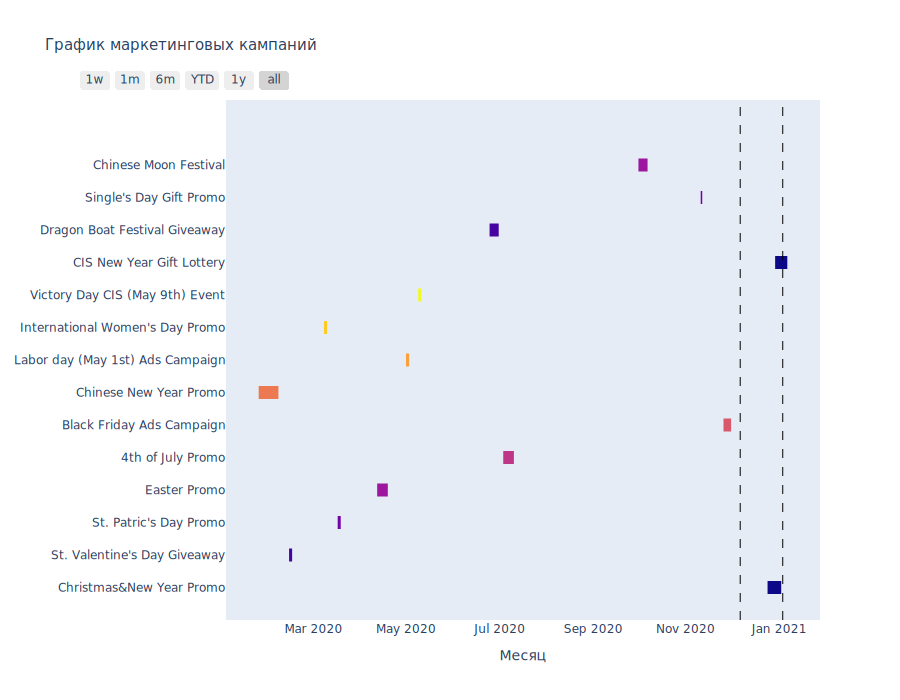

In [15]:
m_events = marketing_events.loc[:,['name', 'start_dt', 'finish_dt']]
m_events.columns = ['Task', 'Start', 'Finish']

fig = ff.create_gantt(m_events, colors = px.colors.sequential.Plasma)

fig.add_trace(go.Scatter(x=['2020-12-07', '2020-12-07'], 
                         y=[-1,300], mode="lines", line_width=1, line_dash="dash", line_color="black"))
fig.add_trace(go.Scatter(x=['2021-01-04', '2021-01-04'], 
                         y=[-1,300], mode="lines", line_width=1, line_dash="dash", line_color="black"))

fig.update_layout(title_text= 'График маркетинговых кампаний', title_font_size=15,
                      xaxis_title='Месяц')
fig.show(width=900, height=700, renderer='svg')

Как видно из графика, кампании "Christmas & New Year Promo" и "CIS New Year Gift Lottery" пересекаются по датам проведения с временными рамками эксперимента.

Объявим функцию, определяющую маркетинговое событие для каждого пользовательского события по пересечению времени и региона:

In [16]:
def mark_event(event_dt, region):
    for row in range(len(marketing_events)):
        start_date = marketing_events['start_dt'][row]
        end_date = marketing_events['finish_dt'][row]
        regions = marketing_events['regions'][row].split(', ')
        name = marketing_events['name'][row]
        if (start_date <= event_dt <= end_date) and (region in regions):
            return name
        return 'no event'

In [17]:
test_data['m_event_name'] = test_data.apply(lambda x: mark_event(x['event_dt'], x['region']), axis=1)
display(test_data.head())

,user_id,group,ab_test,event_dt,event_name,details,first_date,region,device,m_event_name
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99,2020-12-07,EU,PC,no event
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:56,purchase,4.99,2020-12-07,EU,PC,Christmas&New Year Promo
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,NaN,2020-12-07,EU,PC,no event
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-25 00:04:57,product_cart,NaN,2020-12-07,EU,PC,Christmas&New Year Promo
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,NaN,2020-12-07,EU,PC,no event


In [18]:
test_data['m_event_name'].value_counts()

no event                    18953
Christmas&New Year Promo     2889
Name: m_event_name, dtype: int64

Большинство действий пользователей не совпало с проведением каких-либо мероприятий, остальные 2889 записей выпали на Christmas&New Year Promo, удалим их из таблицы:

In [19]:
test_data = test_data.loc[test_data['m_event_name'] != 'Christmas&New Year Promo']
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18953 entries, 0 to 27723
Data columns (total 10 columns):
user_id         18953 non-null object
group           18953 non-null object
ab_test         18953 non-null object
event_dt        18953 non-null datetime64[ns]
event_name      18953 non-null object
details         2527 non-null float64
first_date      18953 non-null datetime64[ns]
region          18953 non-null object
device          18953 non-null object
m_event_name    18953 non-null object
dtypes: datetime64[ns](2), float64(1), object(7)
memory usage: 1.6+ MB
None


После фильтрации осталось 18953 записей.

### Другие проблемы временных границ и полноты данных теста

Из технического задания также известно, что ожидаемый эффект эксперимента - улучшение каждой из метрик конверсии не менее, чем на 10% за 14 дней с момента регистрации пользователей.

Следовательно, необходимо удалить из данных события, произошедшие после 14 дней с момента регистрации:

In [20]:
test_data['days_from_reg'] = test_data['event_dt'] - test_data['first_date']
print('Событий после 14 дней с регистрации: ', len(test_data.loc[test_data['days_from_reg'] > np.timedelta64(14,'D')]))
test_data = test_data.loc[test_data['days_from_reg'] <= np.timedelta64(14,'D')]

Событий после 14 дней с регистрации:  234


Удалено 234 записи с действиями пользователей после 14 дней с регистрации.

**Равномерность распределения пользователей и событий по тестовым группам**

Проверим, как число пользователей и количество событий на пользователя распределены в выборках:

In [21]:
user_stat = test_data.pivot_table(
    index = 'user_id',
    columns = 'group',
    values='event_name', 
    aggfunc=({'event_name': 'count'})).describe().T.round(2)

display(user_stat)

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
A,2422.0,6.03,3.41,1.0,4.0,6.0,8.0,24.0
B,822.0,5.02,3.07,1.0,3.0,4.0,6.0,24.0


За время эксперимента была собрана информация по 2422 и 822 уникальным пользователям в контрольной и экспериментальной группах соответственно. Группы не сбалансированы по количеству, поскольку отличие количества пользователей превышает 1% (рекомендуемое максимальное расхождение для A/B тестов).

В среднем на одного пользователя из группы A приходится 6.03 (от 4 до 8 в половине случаев), показатели для группы B ниже: 5.02 в среднем, от 3 до 6 в половине случаев.

In [22]:
alpha = .05

total = user_stat['count'].sum()
A_size_theoretical = total/2
A_size_empirical = user_stat['count'][0]
    
p1 = A_size_empirical/total
p2 = A_size_theoretical/total
p_combined = (A_size_theoretical + A_size_empirical) / (total*2)
difference = p1 - p2
    
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (2/total))

distr = st.norm(0, 1)  
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('Доля группы A: ', p1.round(2))    
print('Отклонение доли A от теоретического значения (50%): ', difference.round(2))
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: соотношение значимо отличается от 50%')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Доля группы A:  0.75
Отклонение доли A от теоретического значения (50%):  0.25
p-значение:  0.0
Отвергаем нулевую гипотезу: соотношение значимо отличается от 50%


Сравнение соотношения групп по помощи z-критерия показывает, что доля группы A (и B соответственно) статистически значимо отличается от 50%.

**Полнота экспериментальных данных**

Также в ТЗ указано, что аудитория теста составляет 15% новых пользователей из региона EU, при этом ожидаемое количество участников теста - 6000. Проверим соответствие отфильтрованной выборки этим критериям:

In [23]:
print('Количество участников теста:', test_data['user_id'].nunique())

EU_share = (test_data[test_data['region']=='EU']['user_id'].nunique()
           )/(new_users[new_users['region']=='EU']['user_id'].nunique())

print('Доля от новых пользователей из региона EU: {:.2%}'.format(EU_share))

Количество участников теста: 3244
Доля от новых пользователей из региона EU: 6.59%


In [24]:
EU_new_users = new_users[new_users['region']=='EU']['user_id'].nunique()
EU_size_theoretical = EU_new_users*0.15
EU_size_empirical = test_data[test_data['region']=='EU']['user_id'].nunique()
    
p1 = EU_size_empirical/EU_new_users
p2 = EU_size_theoretical/EU_new_users
p_combined = (EU_size_theoretical + EU_size_empirical) / (2*EU_new_users)
difference = p1 - p2
    
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (2/EU_new_users))

distr = st.norm(0, 1)  
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('Доля участников из EU: {:.2%}'.format(p1))    
print('Отклонение доли участников из EU от 15% в п.п.: {:.2%}'.format(difference))
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: доля значимо отличается от 15%')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Доля участников из EU: 6.59%
Отклонение доли участников из EU от 15% в п.п.: -8.41%
p-значение:  0.0
Отвергаем нулевую гипотезу: доля значимо отличается от 15%


Также видим статистически значимое отличие от исходных условий эксперимента.

В результате фильтрации оба требования не выполнены.

**Временные рамки эксперимента**

Изучим, как число событий распределено по дням:

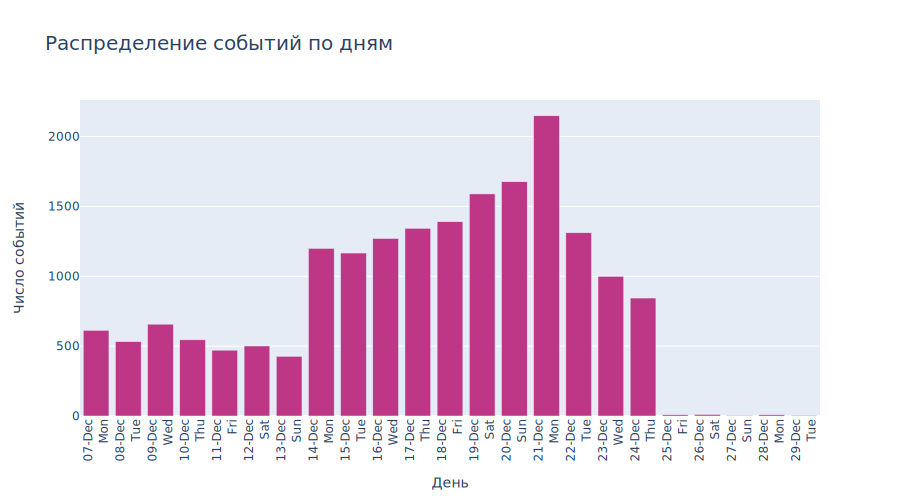

In [25]:
day_stat = test_data.groupby(
    pd.Grouper(key='event_dt', freq='d')).agg({'user_id':['count']}).reset_index()
day_stat.columns = ['event_dt','events']

colors = px.colors.sequential.Plasma
fig = go.Figure([go.Bar(x=day_stat['event_dt'], 
                            y=day_stat['events'], marker_color=colors[4])])
fig.update_layout(title_text='Распределение событий по дням', title_font_size=20,
                  xaxis_title='День',
                  yaxis_title="Число событий")
fig.update_xaxes(dtick=86400000.0, tickformat="%d-%b\n%a", tickangle = 270)

fig.show(width=900, height=500, renderer='svg')

Также изучим, как распределены события по группам:

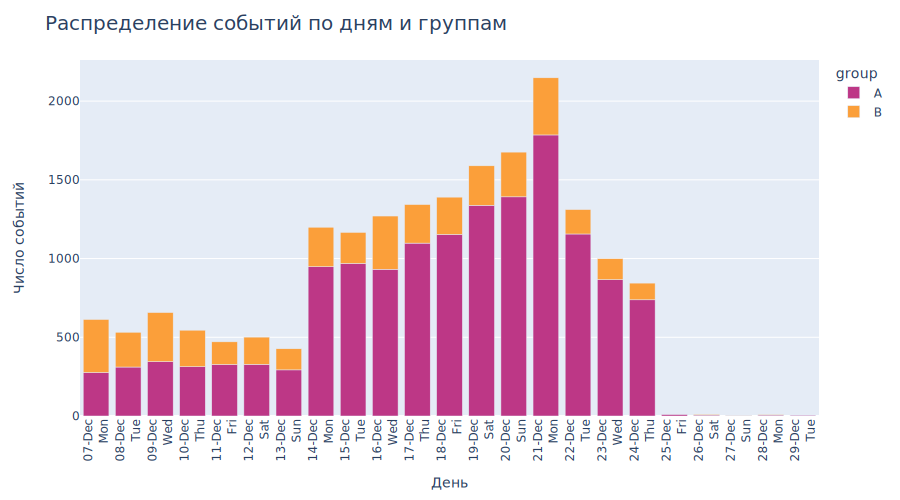

In [26]:
day_user_stat = test_data.groupby(
    ['group', pd.Grouper(key='event_dt', freq='d')]).agg({'user_id':['count']}).reset_index()
day_user_stat.columns = ['group','event_dt','events']

color_discrete_map = {'A': colors[4], 'B': colors[7]} 
fig = px.bar(day_user_stat, x="event_dt", y='events', color="group", 
             color_discrete_map=color_discrete_map)

fig.update_layout(title_text='Распределение событий по дням и группам', title_font_size=20,
                  xaxis_title='День',
                  yaxis_title="Число событий")
fig.update_xaxes(dtick=86400000.0, tickformat="%d-%b\n%a", tickangle = 270)

fig.show(width=900, height=500, renderer='svg')

Как видно на графиках, пик числа посещений пришелся на 21 декабря. Также можно заметить, что на протяжении всего эксперимента соотношение групп постоянно менялось, при этом группа A существенно превосходила контрольную группу, особенно к концу эксперимента.

За 25-29 декабря данные практически отсутствуют. Посмотрим, как распределены события в данных до фильтрации:

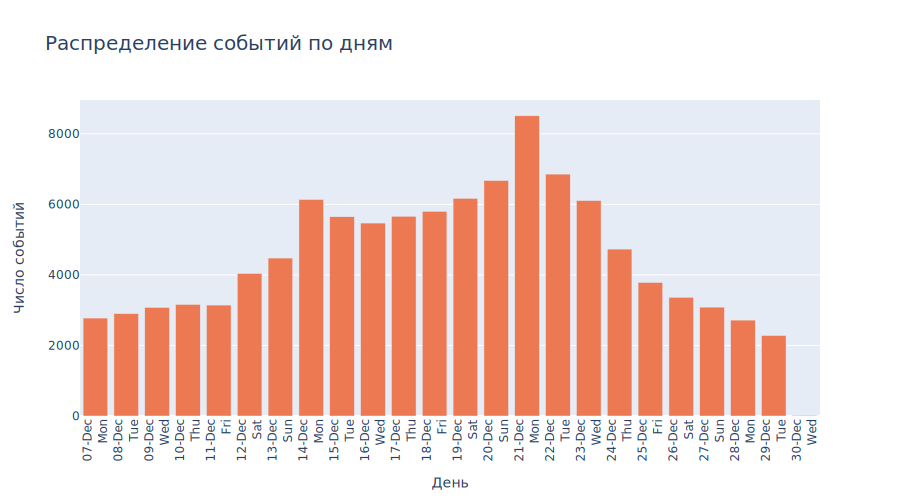

In [27]:
day_stat = data.groupby(
    pd.Grouper(key='event_dt', freq='d')).agg({'user_id':['count']}).reset_index()
day_stat.columns = ['event_dt','events']

fig = go.Figure([go.Bar(x=day_stat['event_dt'], 
                            y=day_stat['events'], marker_color=colors[6])])
fig.update_layout(title_text='Распределение событий по дням', title_font_size=20,
                  xaxis_title='День',
                  yaxis_title="Число событий")
fig.update_xaxes(dtick=86400000.0, tickformat="%d-%b\n%a", tickangle = 270)

fig.show(width=900, height=500, renderer='svg')

До фильтрации распределение более равномерное. Это может быть связано с удалением из данных событий, совпадающих с маркетинговыми кампаниями. Другими словами, в массиве остались только события, совершенные в регионах, где кампании не проводились. Для корректности дальнейшего анализа удалим все записи после 24 декабря.

In [28]:
test_data = test_data[test_data['event_dt']<='2020-12-24']

In [29]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 27723
Data columns (total 11 columns):
user_id          17837 non-null object
group            17837 non-null object
ab_test          17837 non-null object
event_dt         17837 non-null datetime64[ns]
event_name       17837 non-null object
details          2381 non-null float64
first_date       17837 non-null datetime64[ns]
region           17837 non-null object
device           17837 non-null object
m_event_name     17837 non-null object
days_from_reg    17837 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(7), timedelta64[ns](1)
memory usage: 1.6+ MB
None


После фильтрации массива объем анализируемых данных составил 17837 событий.

## Анализ результатов эксперимента

### Воронка событий

Изучим виды и количество событий:

In [30]:
test_data['event_name'].value_counts()

login           8105
product_page    4971
purchase        2381
product_cart    2380
Name: event_name, dtype: int64

Перекодируем названия воронки:

In [31]:
events_dict = {'login':'Логин', 
               'product_page':'Заход на страницу продукта', 
               'product_cart':'Переход в корзину', 
               'purchase':'Покупка'}

test_data['event_name'] = test_data['event_name'].map(lambda x : events_dict[str(x)])

Изучим количество уникальных пользователей с каждым типом событий, а также посчитаем долю каждого из событий от всех уникальных юзеров в логе.

In [32]:
event_types = test_data.groupby('event_name').agg({'user_id':['nunique']}).reset_index()
event_types.columns = ['event_name', 'users']

a = len(test_data['user_id'].unique())
sorter = {'Логин': 0, 'Заход на страницу продукта': 1, 'Переход в корзину': 2, 'Покупка': 3}
event_types = event_types.iloc[event_types['event_name'].map(sorter).argsort()].reset_index(drop=True)

display(event_types)

,event_name,users
0,Логин,3243
1,Заход на страницу продукта,2030
2,Переход в корзину,953
3,Покупка,999


Посчитаем пользователей, купивших без перехода в корзину:

In [33]:
buyers = test_data.query('event_name == "Покупка"')['user_id'].unique()
cart_visitors = test_data.query('event_name == "Переход в корзину"')['user_id'].unique()
buyers_after_cart = len(list(set(buyers) & set(cart_visitors)))
buyers_without_cart = len(list(set(buyers) - set(cart_visitors)))

print('Купили, посетив корзину:', buyers_after_cart)
print('Купили, не посетив корзину:', buyers_without_cart)

Купили, посетив корзину: 309
Купили, не посетив корзину: 690


По сути мы имеем дело с 2 воронками: с посещением корзины и без. Создадим соответствующие таблицы:

In [34]:
event_types_cart = event_types
event_types_cart.at[3,'users'] = buyers_after_cart  
event_types_cart['percent'] = (event_types_cart['users']/a * 100).round(1).astype(str) + '%'

display(event_types_cart)

event_types_without_cart = event_types.drop([2], axis=0)
event_types_without_cart.at[3,'users'] = buyers_without_cart  
event_types_without_cart['percent'] = (event_types_without_cart['users']/a * 100).round(1).astype(str) + '%'

display(event_types_without_cart)

,event_name,users,percent
0,Логин,3243,100.0%
1,Заход на страницу продукта,2030,62.6%
2,Переход в корзину,953,29.4%
3,Покупка,309,9.5%


,event_name,users,percent
0,Логин,3243,100.0%
1,Заход на страницу продукта,2030,62.6%
3,Покупка,690,21.3%


63% всех пользователей посещают продуктовые страницы, 29% попадает в корзину и 9.5% совершают покупку после посещения корзины. Также 21% покупают, не посещая корзину.

**Порядок событий в воронке**

Полученная последовательность событий по убыванию их частоты не соответствует привычной этапности воронки продаж - 
от продуктовой страницы - через переход в корзину - к покупке: доля переходов в корзину оказалась ниже, чем доля покупок. 
Возможно, у пользователей есть возможность оплатить заказ без перехода в корзину. Необходимо обсудить возможные причины с продуктовой командой, но на данном этапе будем строить анализ по воронке: логин - заход на страницу продукта - переход в корзину - покупка.

### Конверсии воронки

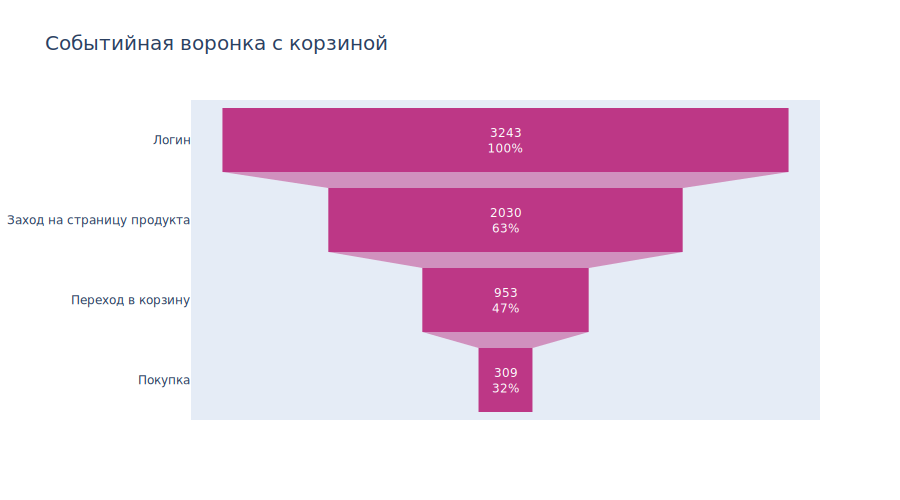

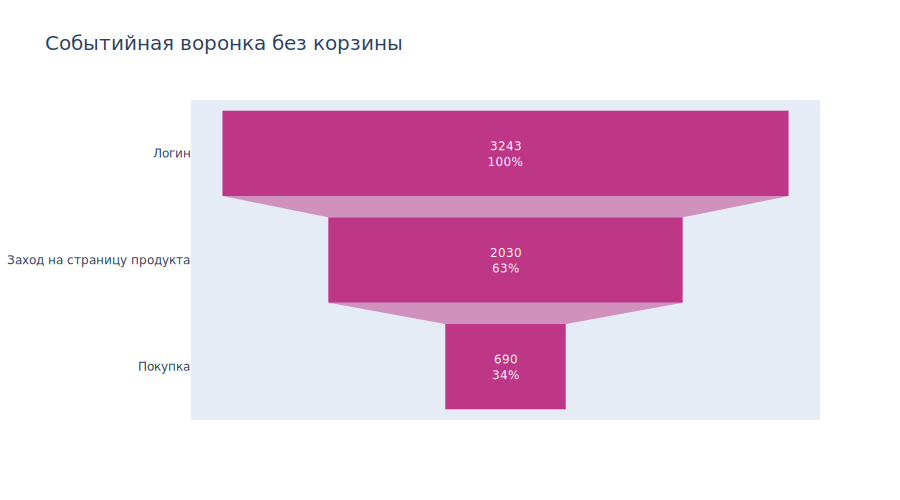

In [35]:
fig = go.Figure(go.Funnel(y = event_types_cart['event_name'],
                          x = event_types_cart['users'],
                          textposition = "inside", marker = {"color": colors[4]},
                          textinfo = "value+percent previous",
                         hoverinfo = "percent previous+percent initial"))
fig.update_layout(title_text='Событийная воронка с корзиной', title_font_size=20)
fig.show(width=900, height=500, renderer='svg')

fig = go.Figure(go.Funnel(y = event_types_without_cart['event_name'],
                          x = event_types_without_cart['users'],
                          textposition = "inside", marker = {"color": colors[4]},
                          textinfo = "value+percent previous",
                         hoverinfo = "percent previous+percent initial"))
fig.update_layout(title_text='Событийная воронка без корзины', title_font_size=20)
fig.show(width=900, height=500, renderer='svg')

Как было установлено ранее, 63% всех залогиненных пользователей попадают на страницу продукта. Из них 47% доходит до корзины, далее из них 32% совершают покупку. Также 34% из тех, кто посетил продуктовые страницы, покупают без перехода в корзину.
Таким образом, большая часть пользователей теряется после посещения продуктовой страницы, не доходя до корзины или прямой покупки.

### Динамика конверсий воронки по группам

Подготовим данные для дальнейшего анализа: создадим сводную таблицу, содержащую ежедневные и накопленные значения метрик посещений продуктовых страниц, авторизации на сайте, переходов в корзину, покупки и конверсии от числа залогиненных пользователей для каждой группы (A и B).

In [36]:
test_data['date'] = test_data['event_dt'].dt.date

agg = test_data.pivot_table(
    index=['date'], 
    columns=['event_name','group'],
    values='user_id',
    aggfunc='nunique').reset_index()

agg.columns = ['date', 'product_page_A', 'product_page_B',
               'login_A', 'login_B', 
               'product_cart_A', 'product_cart_B',
               'purchase_A','purchase_B']

agg['cum_product_page_A'] = agg[('product_page_A')].cumsum(axis=0)
agg['cum_product_page_B'] = agg[('product_page_B')].cumsum(axis=0)
agg['cum_login_A'] = agg[('login_A')].cumsum(axis=0)
agg['cum_login_B'] = agg[('login_B')].cumsum(axis=0)
agg['cum_product_cart_A'] = agg['product_cart_A'].cumsum(axis=0)
agg['cum_product_cart_B'] = agg['product_cart_B'].cumsum(axis=0)
agg['cum_purchase_A'] = agg['purchase_A'].cumsum(axis=0)
agg['cum_purchase_B'] = agg['purchase_B'].cumsum(axis=0)

agg['product_page_conversion_A'] = agg['cum_product_page_A']/agg['cum_login_A']
agg['product_page_conversion_B'] = agg['cum_product_page_B']/agg['cum_login_B']
agg['cart_conversion_A'] = agg['cum_product_cart_A']/agg['cum_login_A']
agg['cart_conversion_B'] = agg['cum_product_cart_B']/agg['cum_login_B']
agg['purchase_conversion_A'] = agg['cum_purchase_A']/agg['cum_login_A']
agg['purchase_conversion_B'] = agg['cum_purchase_B']/agg['cum_login_B']

agg.head()

,date,product_page_A,product_page_B,login_A,login_B,product_cart_A,product_cart_B,purchase_A,purchase_B,cum_product_page_A,...,cum_product_cart_A,cum_product_cart_B,cum_purchase_A,cum_purchase_B,product_page_conversion_A,product_page_conversion_B,cart_conversion_A,cart_conversion_B,purchase_conversion_A,purchase_conversion_B
0,2020-12-07,81,95,128,146,30,42,37,54,81,...,30,42,37,54,0.632812,0.650685,0.234375,0.287671,0.289062,0.369863
1,2020-12-08,99,55,145,104,34,32,33,30,180,...,64,74,70,84,0.659341,0.600000,0.234432,0.296000,0.256410,0.336000
2,2020-12-09,96,90,157,149,45,40,47,33,276,...,109,114,117,117,0.641860,0.601504,0.253488,0.285714,0.272093,0.293233
3,2020-12-10,85,62,145,116,41,32,42,22,361,...,150,146,159,139,0.627826,0.586408,0.260870,0.283495,0.276522,0.269903
4,2020-12-11,88,38,160,77,41,17,38,12,449,...,191,163,197,151,0.610884,0.574324,0.259864,0.275338,0.268027,0.255068


Построим графики кумулятивной конверсии по группам и график относительного изменения кумулятивной конверсии группы B к группе A.

In [37]:
def convertion_plot(conversion_A, conversion_B, metrics):
    fig = go.Figure([go.Scatter(x=agg['date'], y=agg[conversion_A], name='A', marker = {"color": colors[4]})])
    fig2 = go.Figure([go.Scatter(x=agg['date'], y=agg[conversion_B], name='B', marker = {"color": colors[7]})])
    fig.add_trace(fig2.data[0])
    fig.update_layout(title_text=metrics+' cumilative conversion', title_font_size=20,
                      xaxis_title='date', width=700, height=350,
                      yaxis_title="conversion")
    fig.show()

    fig = go.Figure([go.Scatter(x=agg['date'], 
                                y=(agg[conversion_B]/agg[conversion_A]-1),
                                marker = {"color": colors[2]})])
    fig.add_trace(go.Scatter(x=['2020-12-06', '2020-12-23'], 
                             y=[0,0], mode="lines", line_width=1, 
                             line_dash="dash", line_color="black"))
    fig.update_layout(title_text=metrics+' conversion ratio', title_font_size=20,
                      xaxis_title='date',
                      yaxis_title="conversion ratio", showlegend=False)
    fig.show(width=700, height=350, renderer='svg')

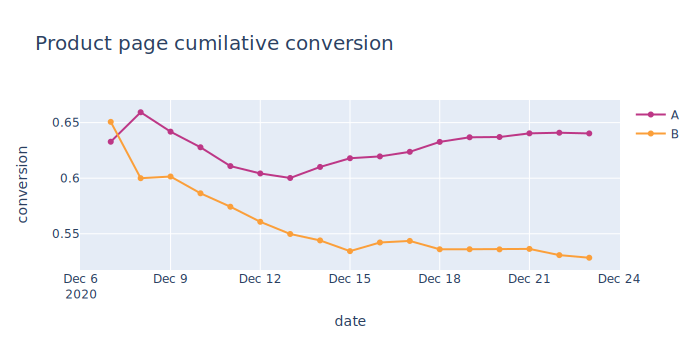

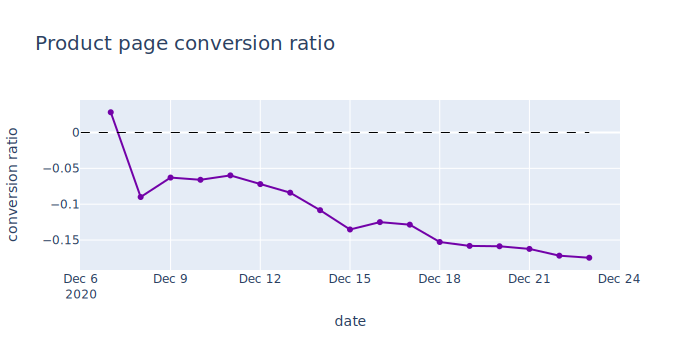

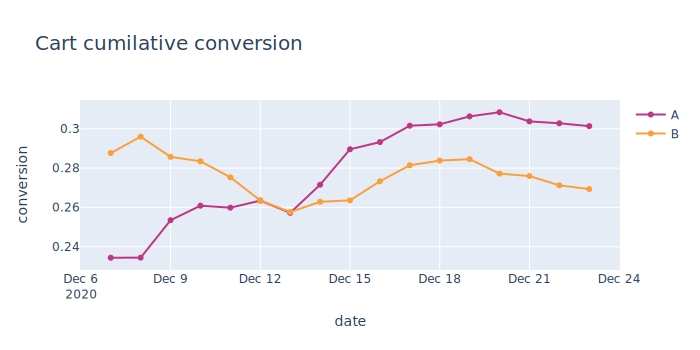

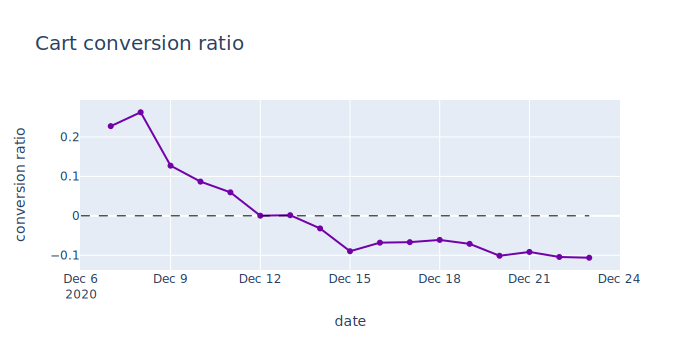

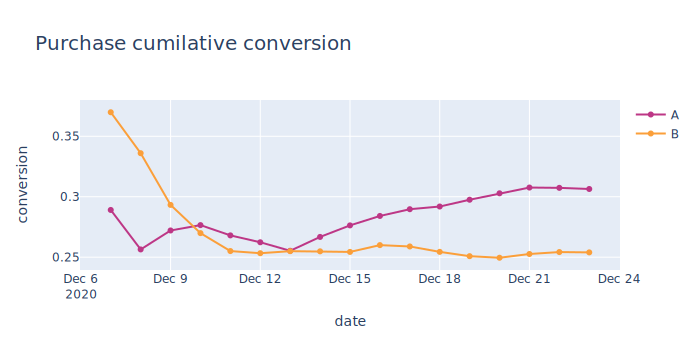

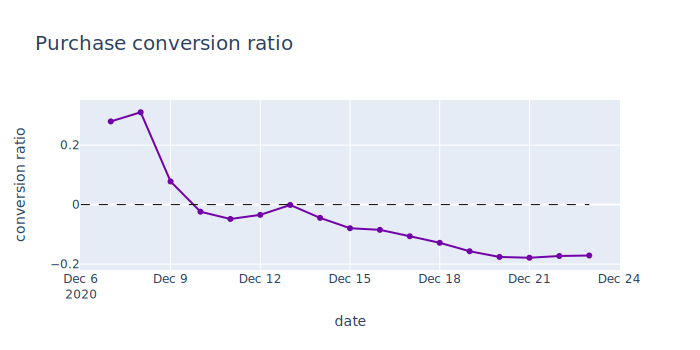

In [38]:
convertion_plot('product_page_conversion_A', 'product_page_conversion_B', 'Product page')
convertion_plot('cart_conversion_A', 'cart_conversion_B', 'Cart')
convertion_plot('purchase_conversion_A', 'purchase_conversion_B', 'Purchase')

В первые дни эксперимента метрики кумулятивной конверсии обеих групп сильно колебались и стабилизировались к его окончанию.

- Метрика кумулятивной конверсии **посещения продуктовых страниц** группы A росла с 13 декабря, а для группы B оказалась ниже со 2 дня эксперимента и снижалась на всем его протяжении.
- Метрика кумулятивной конверсии **перехода в корзину** росла в обеих группах с 13 декабря, однако с этой же даты и до окончания эксперимента показатель контрольной группы был выше.
- Метрика кумулятивной конверсии **покупок** группы A росла и была выше группы B начиная с 13 декабря, в то время как метрика группы B снижалась до 12 декабря и незначительно колебалась в оставшиеся дни эксперимента.

Таким образом, по всем метрикам экспериментальная группа оставалась хуже контрольной на протяжении большей части теста.

### Итоговые конверсии воронки по группам

In [39]:
buyers_A = test_data.query('event_name == "Покупка" & group == "A"')['user_id'].unique()
buyers_B = test_data.query('event_name == "Покупка" & group == "B"')['user_id'].unique()
cart_visitors_A = test_data.query('event_name == "Переход в корзину" & group == "A"')['user_id'].unique()
cart_visitors_B = test_data.query('event_name == "Переход в корзину" & group == "B"')['user_id'].unique()

buyers_after_cart_A = len(list(set(buyers_A) & set(cart_visitors_A)))
buyers_after_cart_B = len(list(set(buyers_B) & set(cart_visitors_B)))
buyers_without_cart_A = len(list(set(buyers_A) - set(cart_visitors_A)))
buyers_without_cart_B = len(list(set(buyers_B) - set(cart_visitors_B)))

print('Купили, посетив корзину (группа A):', buyers_after_cart_A)
print('Купили, посетив корзину (группа B):', buyers_after_cart_B)
print('Купили, не посетив корзину (группа A):', buyers_without_cart_A)
print('Купили, не посетив корзину (группа B):', buyers_without_cart_B)

Купили, посетив корзину (группа A): 240
Купили, посетив корзину (группа B): 69
Купили, не посетив корзину (группа A): 533
Купили, не посетив корзину (группа B): 157


Расчитаем воронку по контрольной и экспериментальной группам и визуализируем результат:

In [40]:
events_exp = test_data.pivot_table(
    index='event_name',
    columns='group',
    values='user_id',
    aggfunc='nunique').reset_index()

events_exp.columns = ['event_name', 'A', 'B']
sorter = {'Логин': 0, 'Заход на страницу продукта': 1, 'Переход в корзину': 2, 'Покупка': 3}
events_exp = events_exp.iloc[events_exp['event_name'].map(sorter).argsort()].reset_index(drop=True)

events_exp_cart = events_exp
events_exp_without_cart = events_exp.drop([2], axis=0)

events_exp_cart.at[3,'A'] = buyers_after_cart_A  
events_exp_cart.at[3,'B'] = buyers_after_cart_B
events_exp_without_cart.at[3,'A'] = buyers_without_cart_A  
events_exp_without_cart.at[3,'B'] = buyers_without_cart_B

events_exp_cart['A_percent'] = (events_exp_cart['A']/(events_exp_cart.at[0,'A'])* 100).round(2).astype(str) + '%'
events_exp_cart['B_percent'] = (events_exp_cart['B']/(events_exp_cart.at[0,'B'])* 100).round(2).astype(str) + '%'
events_exp_without_cart['A_percent'] = (events_exp_without_cart['A']/
                                        (events_exp_without_cart.at[0,'A'])* 100).round(2).astype(str) + '%'
events_exp_without_cart['B_percent'] = (events_exp_without_cart['B']/
                                        (events_exp_without_cart.at[0,'B'])* 100).round(2).astype(str) + '%'

display(events_exp_cart)
display(events_exp_without_cart)

,event_name,A,B,A_percent,B_percent
0,Логин,2422,821,100.0%,100.0%
1,Заход на страницу продукта,1571,459,64.86%,55.91%
2,Переход в корзину,728,225,30.06%,27.41%
3,Покупка,240,69,9.91%,8.4%


,event_name,A,B,A_percent,B_percent
0,Логин,2422,821,100.0%,100.0%
1,Заход на страницу продукта,1571,459,64.86%,55.91%
3,Покупка,533,157,22.01%,19.12%


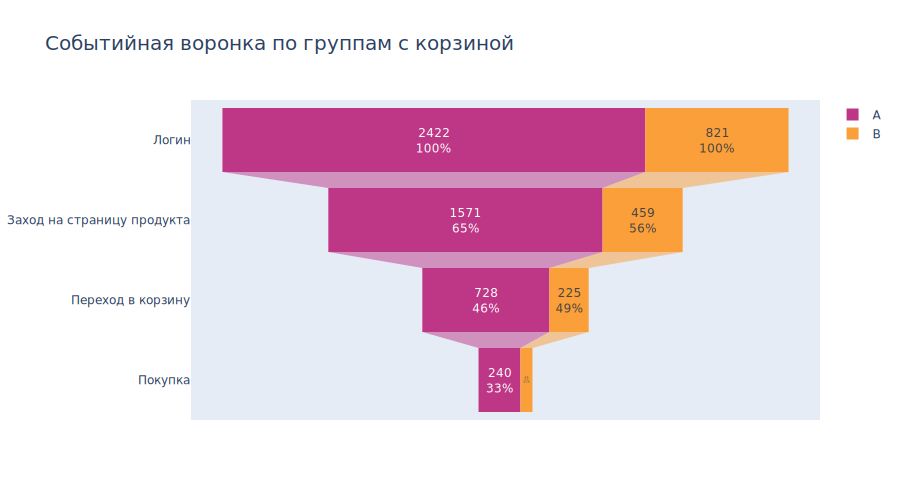

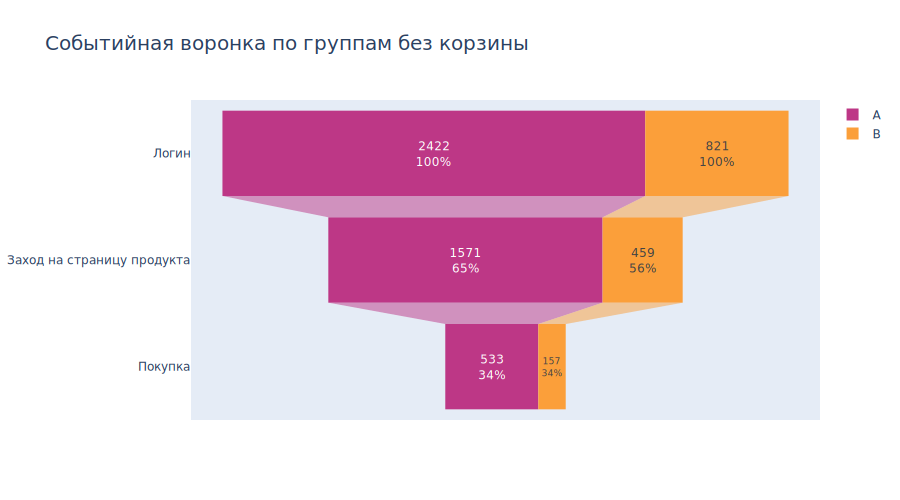

In [41]:
fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'A',
    y = events_exp_cart['event_name'],
    x = events_exp_cart['A'],
    textposition = "inside", textinfo = "value+percent previous",
    marker = {"color": colors[4]}, hoverinfo = "percent previous+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = events_exp_cart['event_name'],
    x = events_exp_cart['B'],
    textposition = "inside", textinfo = "value+percent previous", 
    marker = {"color": colors[7]}, hoverinfo = "percent previous+percent initial"))

fig.update_layout(title_text='Событийная воронка по группам с корзиной', title_font_size=20)
fig.show(width=900, height=500, renderer='svg')

fig = go.Figure()
fig.add_trace(go.Funnel(
    name = 'A',
    y = events_exp_without_cart['event_name'],
    x = events_exp_without_cart['A'],
    textposition = "inside", textinfo = "value+percent previous",
    marker = {"color": colors[4]}, hoverinfo = "percent previous+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = events_exp_without_cart['event_name'],
    x = events_exp_without_cart['B'],
    textposition = "inside", textinfo = "value+percent previous", 
    marker = {"color": colors[7]}, hoverinfo = "percent previous+percent initial"))

fig.update_layout(title_text='Событийная воронка по группам без корзины', title_font_size=20)
fig.show(width=900, height=500, renderer='svg')

Максимальное различие по показателям конверсии между экспериментальной и контрольной группой составляет 9 процентных пункта - по конверсии логинов в заходы на продуктовую страницу. По конверсии переходов в корзину группа B оказалась лучше контрольной группы (49% против 46%). Конверсии посещений продуктовых в покупки практически равны. Чтобы убедиться в корректности выводов, проверим гипотезы о равенстве конверсий для групп A и B при помощи z-критерия.

### Проверка статистических гипотез

Проверим статистическую достоверность отличий групп A и B при помощи z-теста для проверки равенства долей:
* H0 - нет статистически значимых различий между конверсиями [метрики] для пользователей контрольной и экспериментальной групп;
* H1 - есть статистически значимые различия между конверсиями [метрики] для контрольной и экспериментальной групп.

Создадим функцию для проверки гипотез с поправкой на множественные сравнения:

In [42]:
def z_test (df, alpha, n_compared, event_name, first_group, second_group):
    total_first_group = df.loc[df['event_name'] == 'Логин', first_group].values
    total_second_group = df.loc[df['event_name'] == 'Логин', second_group].values
    converted_first_group = df.loc[df['event_name'] == event_name, first_group].values
    converted_second_group = df.loc[df['event_name'] == event_name, second_group].values
    
    p1 = converted_first_group/total_first_group
    p2 = converted_second_group/total_second_group
    p_combined = (converted_first_group + converted_second_group) / (total_first_group + total_second_group)
    difference = p1 - p2
    
    z_value = difference / math.sqrt(
        p_combined * (1 - p_combined) * (1/total_first_group + 1/total_second_group))
    
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    print('разность конверсий: ', difference[0].round(2))
    print('p-значение: ', p_value[0])

    bonferroni_alpha = alpha /n_compared

    if p_value < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Как было видно на диаграмме воронки, значения пропорций групп очень близки, поэтому минимизируем риск обнаружения ложных межгрупповых отличий и установим пороговое значение alpha, равным 0.01, то есть будем отвергать нулевую гипотезу, если вероятность обнаружить межргупповые различия при их отсутствии в генеральной совокупности меньше 1%.

In [43]:
for i in (events_exp_cart['event_name'][1:]):
    print('\033[1m'+ 'Событие: ', i, '\033[0m')
    z_test (events_exp_cart, 0.01, 4, i, 'A', 'B')
    print()
    
for i in (events_exp_without_cart['event_name'][2:]):
    print('\033[1m'+ 'Событие без посещения корзины: ', i, '\033[0m')
    z_test (events_exp_without_cart, 0.01, 4, i, 'A', 'B')
    print()

Событие:  Заход на страницу продукта 
разность конверсий:  0.09
p-значение:  4.575797608152854e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница

Событие:  Переход в корзину 
разность конверсий:  0.03
p-значение:  0.14938759297956405
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие:  Покупка 
разность конверсий:  0.02
p-значение:  0.20440508100190513
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Событие без посещения корзины:  Покупка 
разность конверсий:  0.03
p-значение:  0.08104114245079952
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



Для конверсии переходов на продуктовые страницы гипотеза об отсутствии значимых отличий групп была отвергнута. Следовательно, можно считать, что обновленная система рекомендаций ухудшает конверсию в посещение продуктовых страниц (на 0.09 в среднем). Однако учитывая другие проблемы с временными рамками и аудиторией теста, и этому результату доверять нельзя.

Для остальных метрик (переход в корзину, покупка с посещением корзины и покупка без перехода в корзину) полученные значения p-value говорят о том, что с вероятностью 8-20% наблюдаемые различия между группами A и B можно получить случайно. 

## Общий вывод

**Характеристики исходных данных**

В рамках исследования были использованы данные, полученные в ходе A/B-эксперимента интернет-магазина, целью которого являлась оценка влияния новой рекомендательной системы на поведение пользователей. В исходных массивах (Marketing events, New users, Events и Participants) дубликатов и пропусков не обнаружено, типы переменных распознаны верно, названия переменных и категориальные переменные закодированы кооректно.

На этапе фильтрации данных в соответствии с требованиями технического задания были удалены действия:
- не относящиеся к тесту recommender_system_test (полученные в рамках теста interface_eu_test)
- выходящие за временные границы эксперимента (с 2020-12-07 по 2021-01-04)
- относящиеся к пользователям, зарегистрированным после 2020-12-21
- относящиеся к участникам контрольной группы другого эксперимента (interface_eu_test)
- совпавшие по времени и региону с Christmas&New Year Promo
- произошедшие после 14 дней с момента регистрации

После фильтрации массива объем анализируемых данных составил 17837 событий. Отфильтрованная выборка не соответствует условиям эксперимента: 6.59% новых пользователей из региона EU вместо 15%, количество участников теста - 3244 вместо 6000. Также было выявлено, что группы A и B не сбалансированы по количеству (2422 и 822 уникальных пользователей в контрольной и экспериментальной группах соответственно) при рекомендуемом максимальном расхождении 1%.


**Анализ результатов эксперимента**

В среднем на одного пользователя из группы A приходится 6.03 (от 4 до 8 в половине случаев), показатели для группы B ниже: 5.02 в среднем, от 3 до 6 в половине случаев. Анализ воронки продаж строился в соотвествии с этапностю: посещение продуктовой страницы - клик по кнопке "купить" - переход в корзину. Так, было установлено, что 63% всех залогиненных пользователей попадают на страницу продукта, из них 49% доходит до клика по кнопке "купить", далее из них 95% попадает в корзину. Таким образом, большая часть пользователей теряется после посещения продуктовой страницы, не доходя до покупки.

По всем метрикам экспериментальная группа оставалась хуже контрольной на протяжении большей части теста. При этом максимальное различие по показателям конверсии между экспериментальной и контрольной группой составляет 9 процентных пункта - по конверсии логинов в заходы на продуктовую страницу, на втором месте - конверсия кликов "купить" в переходы в корзину (6 процентных пунктов), конверсии посещений продуктовых сраниц в клики "купить" практически равны. 

Проверка гипотез о равенстве долей для 2 групп при помощи z-критерия дала следующие результаты:
* Заход на страницу продукта. разность конверсий:  0.09, p-значение:  0.0
* Переход в корзину. разность конверсий:  0.03, p-значение:  0.1494
* Покупка с посещением корзины. разность конверсий:  0.02, p-значение:  0.2044
* Покупка без посещения корзины. разность конверсий:  0.03, p-значение:  0.0810

Таким образом, гипотеза об отсутствии значимых отличий групп была отвергнута только для конверсии переходов на продуктовые страницы, для остальных метрик нулевая гипотеза не была отвергнута. Однако из-за проблем с аудиторией и временными рамками теста результатам эксперимента доверять нельзя, следовательно, нельзя однозначно сделать вывод, что обновленная система рекомендаций ухудшает конверсию в посещение продуктовых страниц и не оказывает значимого влияния на другие метрики конверсии.